Лабораторная работа №3\
Вариант 9\


Импорт библиотек

In [2]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_circles  
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, \
    roc_curve, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

Создание первого набора данных

In [3]:
n_samples_1 = 1000
n_samples_2 = 100ggggg
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2], centers=centers, cluster_std=clusters_std, random_state=0, shuffle=False)

Создание тестовых выборок\
Создание Pipeline\
Просмотр гиперпараметров

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipe_gaussiannb = Pipeline([('clf', GaussianNB())])

GaussianNB().get_params().keys()

dict_keys(['priors', 'var_smoothing'])

Ищем лучшие параметры(промежуток выбирался вручную методом биссекции)\
Подставляем наши данные в нашу модель

In [5]:
param_grid = {'clf__priors': [None], 'clf__var_smoothing': [0.05, 0.043875, 0.03775, 0.031625, 0.0255]}

best_estimator_gaussiannb = GridSearchCV(pipe_gaussiannb, param_grid=param_grid, cv=5)

best_estimator_gaussiannb.fit(x_train, y_train)

best_estimator_gaussiannb_predict = best_estimator_gaussiannb.predict(x_test)
print(best_estimator_gaussiannb.best_params_)

{'clf__priors': None, 'clf__var_smoothing': 0.03775}


Некоторые метрики

In [6]:
print("PRECISION:", precision_score(y_test, best_estimator_gaussiannb_predict))
print("RECALL:", recall_score(y_test, best_estimator_gaussiannb_predict))
print("F1:", f1_score(y_test, best_estimator_gaussiannb_predict))
print('roc_auc_score:', roc_auc_score(y_test, best_estimator_gaussiannb_predict))

PRECISION: 0.8666666666666667
RECALL: 0.896551724137931
F1: 0.8813559322033899
roc_auc_score: 0.9378046578804838


Матрица ошибок\
Как мы видим у нас 4 ложно положительных и 3 ложно отрицательных значения

CONFUSION MATRIX TEST:


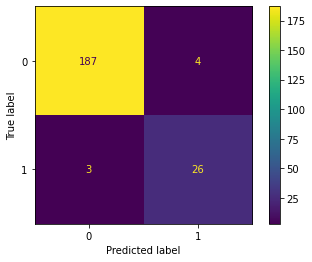

In [7]:
print("CONFUSION MATRIX TEST:")

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, best_estimator_gaussiannb_predict))
display.plot()
plt.show()

Кривая ошибок\
Видно что площаль под графиком близится к единице, что свидетельствует о высоком проценте правильности модели

ROC curve:


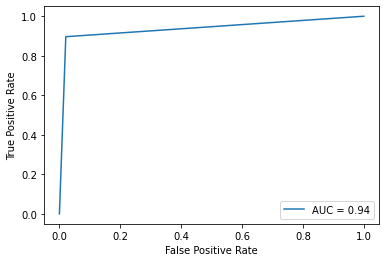

In [8]:
print("ROC curve:")
display1 = RocCurveDisplay(roc_auc=roc_auc_score(y_test, best_estimator_gaussiannb_predict),
                           fpr=roc_curve(y_test, best_estimator_gaussiannb_predict)[0],
                           tpr=roc_curve(y_test, best_estimator_gaussiannb_predict)[1])
display1.plot()
plt.show()

PR-кривая

Precision recall curve:


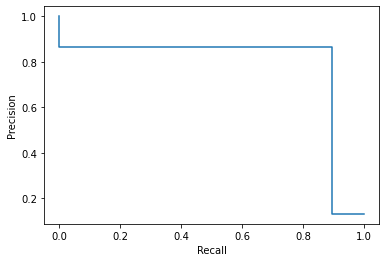

In [9]:
print("Precision recall curve:")
display2 = PrecisionRecallDisplay(precision=precision_recall_curve(y_test, best_estimator_gaussiannb_predict)[0],
                                  recall=precision_recall_curve(y_test, best_estimator_gaussiannb_predict)[1])
display2.plot()
plt.show()

Создание данных для второй модели

In [10]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2], centers=centers, cluster_std=clusters_std, random_state=0, shuffle=False)

Создание тренировочных выборок и Pipeline\
Просмотр гипперпараметров

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
pipe_multinomialnnb = Pipeline([('clf', MultinomialNB())])

MultinomialNB().get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

Подстановка данных в модель показывает что данные не мог быть использованы в этой моделе

In [12]:
param_grid = {'clf__alpha': [1.0, 0, 0.1, 0.01, 0.01], 'clf__class_prior': [None], 'clf__fit_prior':[True, False]}

best_estimator_multinomialnnb = GridSearchCV(pipe_multinomialnnb, param_grid=param_grid, cv=5)

best_estimator_multinomialnnb.fit(x_train, y_train)

best_estimator_multinomialnnb_predict = best_estimator_multinomialnnb.predict(x_test)

print(best_estimator_multinomialnnb.best_params_)

E:\DS\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\DS\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\DS\Anaconda\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "E:\DS\Anaconda\lib\site-packages\sklearn\naive_bayes.py", line 641, in fit
    self._count(X, Y)
  File "E:\DS\Anaconda\lib\site-packages\sklearn\naive_bayes.py", line 763, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "E:\DS\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 1047, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passe

ValueError: Negative values in data passed to MultinomialNB (input X)

Создание второго набора данных

In [13]:
X, y = make_circles(1000 , factor =.1 , noise =.1)

Создание тренировочных выборок и pipeline\
Просмотр гиперпараметров

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
pipe_multinomialnnb = Pipeline([('clf', MultinomialNB())])

MultinomialNB().get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

Подстановка данных в модель показывает что данные не мог быть использованы в этой моделе

In [15]:
param_grid = {'clf__alpha': [1.0, 0, 0.1, 0.01, 0.01], 'clf__class_prior': [None], 'clf__fit_prior':[True, False]}

best_estimator_multinomialnnb = GridSearchCV(pipe_multinomialnnb, param_grid=param_grid, cv=5)

best_estimator_multinomialnnb.fit(x_train, y_train)

best_estimator_multinomialnnb_predict = best_estimator_multinomialnnb.predict(x_test)

print(best_estimator_multinomialnnb.best_params_)

E:\DS\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\DS\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\DS\Anaconda\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "E:\DS\Anaconda\lib\site-packages\sklearn\naive_bayes.py", line 641, in fit
    self._count(X, Y)
  File "E:\DS\Anaconda\lib\site-packages\sklearn\naive_bayes.py", line 763, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "E:\DS\Anaconda\lib\site-packages\sklearn\utils\validation.py", line 1047, in check_non_negative
    raise ValueError("Negative values in data passed to %s" % whom)
ValueError: Negative values in data passe

ValueError: Negative values in data passed to MultinomialNB (input X)

Создание Pipeline\
Просмотр гиперпараметров

In [16]:
pipe_gaussiannb = Pipeline([('clf', GaussianNB())])

GaussianNB().get_params().keys()

dict_keys(['priors', 'var_smoothing'])

Подбор гиперпараметров\
Подстановка тренировочной выборки

In [18]:
param_grid = {'clf__priors': [None], 'clf__var_smoothing': np.arange(0, 1, 0.05)}

best_estimator_gaussiannb = GridSearchCV(pipe_gaussiannb, param_grid=param_grid, cv=5)

best_estimator_gaussiannb.fit(x_train, y_train)

best_estimator_gaussiannb_predict = best_estimator_gaussiannb.predict(x_test)

print(best_estimator_gaussiannb.best_params_)

{'clf__priors': None, 'clf__var_smoothing': 0.1}


Просмотр метрик

In [19]:
print("PRECISION:", precision_score(y_test, best_estimator_gaussiannb_predict))
print("RECALL:", recall_score(y_test, best_estimator_gaussiannb_predict))
print("F1:", f1_score(y_test, best_estimator_gaussiannb_predict))
print('roc_auc_score:', roc_auc_score(y_test, best_estimator_gaussiannb_predict))

PRECISION: 1.0
RECALL: 1.0
F1: 1.0
roc_auc_score: 1.0


Просмотр матрицы ошибк

CONFUSION MATRIX TEST:


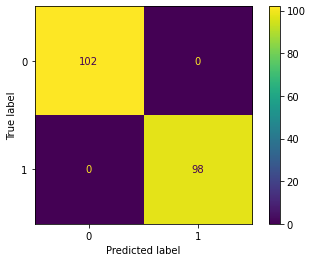

In [20]:
print("CONFUSION MATRIX TEST:")

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, best_estimator_gaussiannb_predict))
display.plot()
plt.show()

Кривая ошибок

ROC curve:


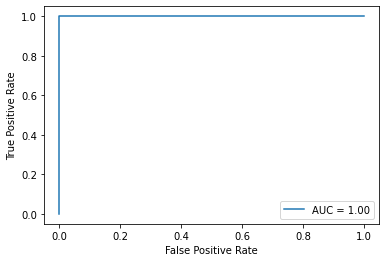

In [21]:
print("ROC curve:")
display1 = RocCurveDisplay(roc_auc=roc_auc_score(y_test, best_estimator_gaussiannb_predict),
                           fpr=roc_curve(y_test, best_estimator_gaussiannb_predict)[0],
                           tpr=roc_curve(y_test, best_estimator_gaussiannb_predict)[1])
display1.plot()
plt.show()

PR-кривая

Precision recall curve:


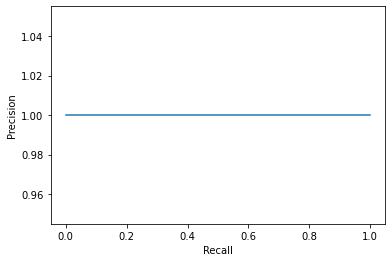

In [22]:
print("Precision recall curve:")
display2 = PrecisionRecallDisplay(precision=precision_recall_curve(y_test, best_estimator_gaussiannb_predict)[0],
                                  recall=precision_recall_curve(y_test, best_estimator_gaussiannb_predict)[1])
display2.plot()
plt.show()